C:\Users\jahid\AppData\Local\Temp\ipykernel_18484\804707922.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([basic_gas, light_gas], labels=['Basic', 'Lightweight'])
C:\Users\jahid\AppData\Local\Temp\ipykernel_18484\804707922.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([basic_gas, light_gas], labels=['Basic', 'Lightweight'])
C:\Users\jahid\AppData\Local\Temp\ipykernel_18484\804707922.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([basic_time, light_time], labels=['Basic', 'Lightweight'])
C:\Users\jahid\AppData\Local\Temp\ipykernel_18484\804707922.py:78: Matplotlib


Add Patient - gasUsed Summary:
Basic Average: 154024.68
Lightweight Average: 92081.10
Improvement: 40.22%

Add Patient - executionTimeMs Summary:
Basic Average: 40.77
Lightweight Average: 51.29
Improvement: -25.79%

Delete Patient - gasUsed Summary:
Basic Average: 43715.42
Lightweight Average: 29711.71
Improvement: 32.03%

Delete Patient - executionTimeMs Summary:
Basic Average: 39.67
Lightweight Average: 43.16
Improvement: -8.78%

Add Doctor - gasUsed Summary:
Basic Average: 197072.24
Lightweight Average: 98002.14
Improvement: 50.27%

Add Doctor - executionTimeMs Summary:
Basic Average: 38.81
Lightweight Average: 48.16
Improvement: -24.11%


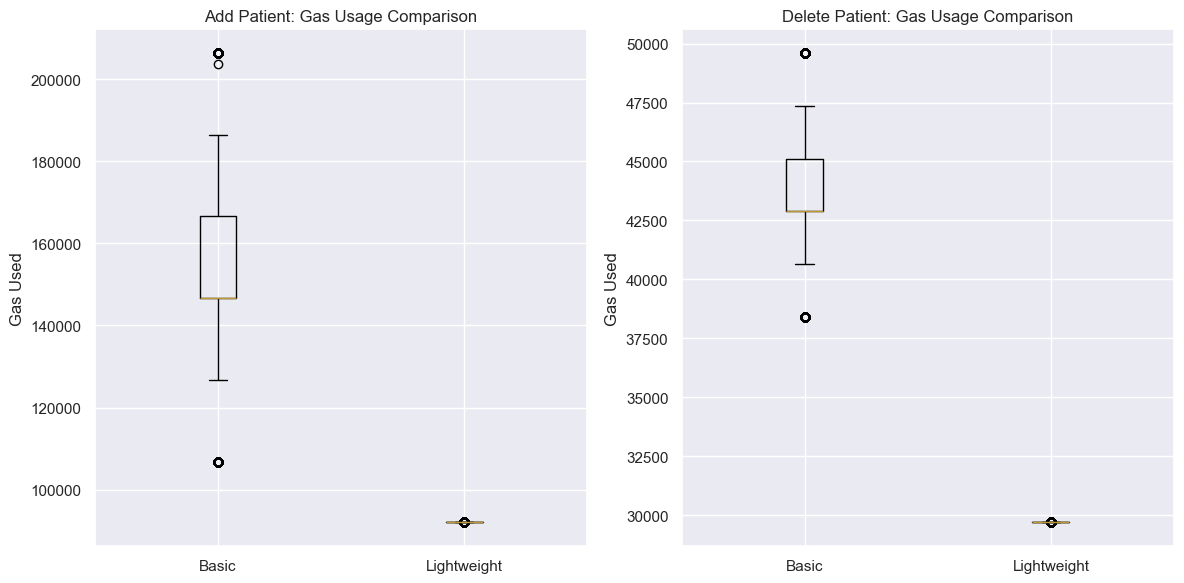

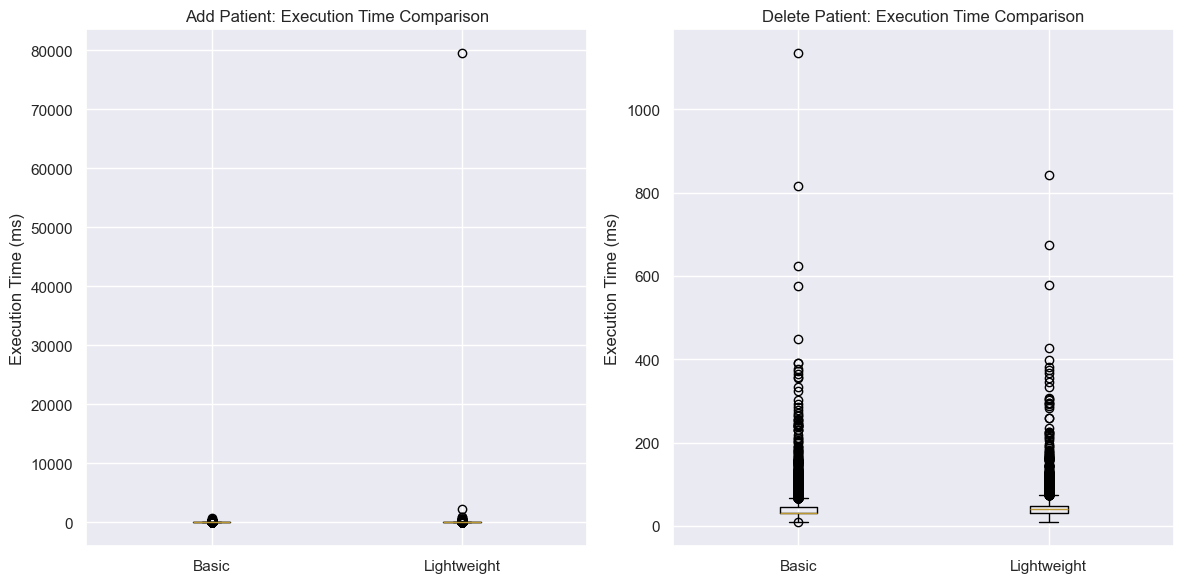

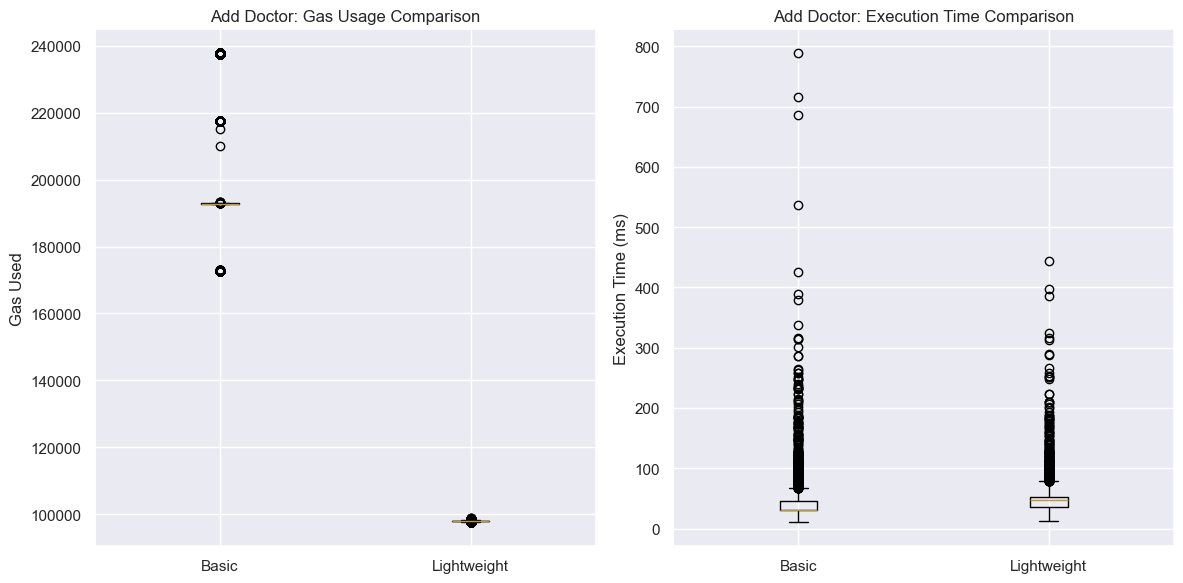

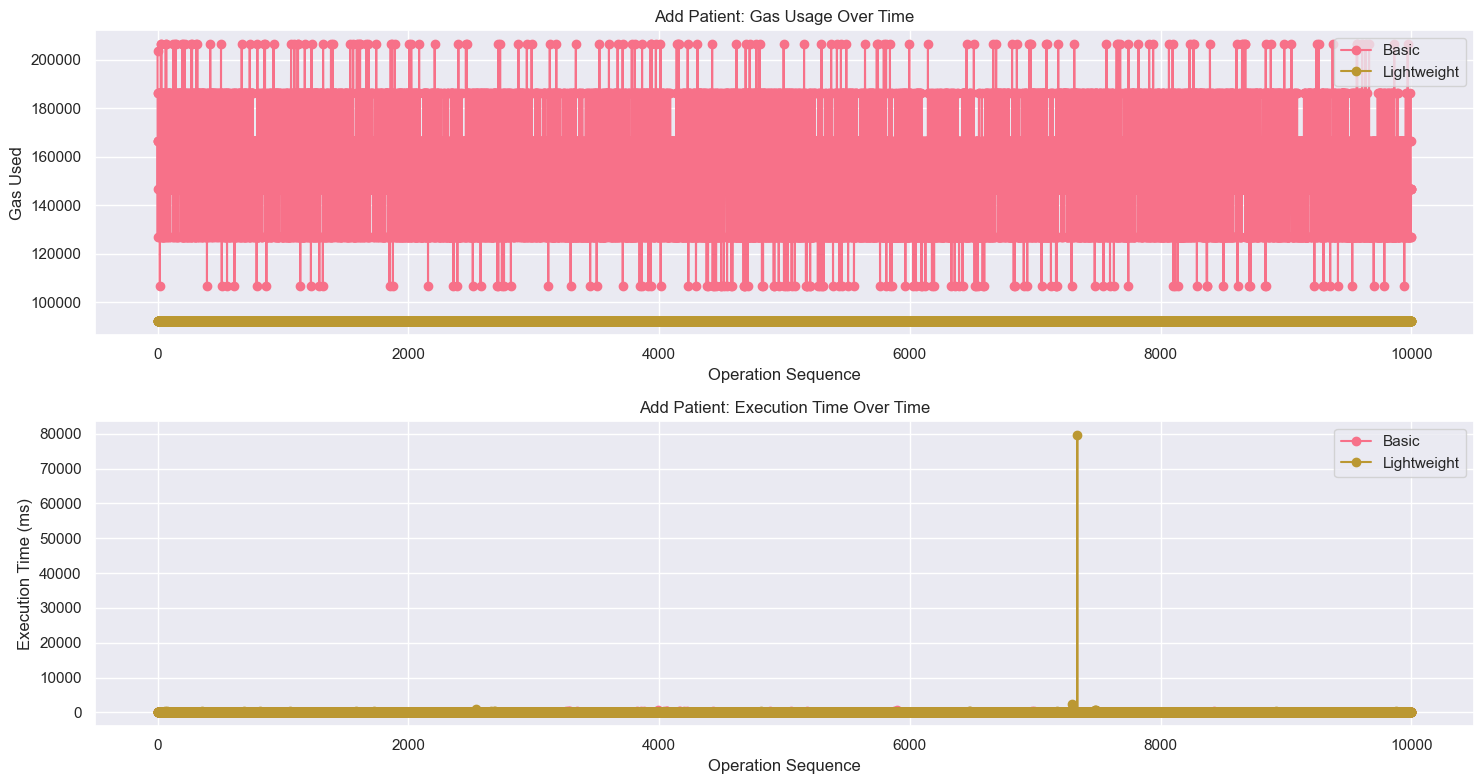

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the JSON data
with open('performanceBasic.json', 'r') as f:
    basic_data = json.load(f)

with open('performanceLightweight.json', 'r') as f:
    lightweight_data = json.load(f)

def extract_metrics(data, operation):
    """Extract gas used and execution time for a specific operation"""
    metrics = []
    for item in data:
        metrics.append({
            'id': item['id'],
            'gasUsed': int(item['gasUsed']),
            'executionTimeMs': float(item['executionTimeMs'])
        })
    return metrics

# Extract metrics for different operations
basic_add_patient = extract_metrics(basic_data['patient']['addPatient'], 'addPatient')
basic_delete_patient = extract_metrics(basic_data['patient']['deletePatient'], 'deletePatient')
basic_add_doctor = extract_metrics(basic_data['doctor']['addDoctor'], 'addDoctor')

light_add_patient = extract_metrics(lightweight_data['patient']['addPatient'], 'addPatient')
light_delete_patient = extract_metrics(lightweight_data['patient']['deletePatient'], 'deletePatient')
light_add_doctor = extract_metrics(lightweight_data['doctor']['addDoctor'], 'addDoctor')

# Set up the plotting style
# plt.style.use('seaborn') # This line caused the error. 'seaborn' is not a built-in Matplotlib style.
# Instead, use Seaborn's set_theme() or set() functions to apply Seaborn's styling.
sns.set_theme() # Applies Seaborn's default theme. 
# or
# sns.set(style="darkgrid") # You can specify a different Seaborn style like 'darkgrid', 'whitegrid', etc.
sns.set_palette("husl")

# Figure 1: Gas Usage Comparison for Patient Operations
plt.figure(figsize=(12, 6))

# Add Patient Gas Usage
plt.subplot(1, 2, 1)
basic_gas = [x['gasUsed'] for x in basic_add_patient]
light_gas = [x['gasUsed'] for x in light_add_patient]
plt.boxplot([basic_gas, light_gas], labels=['Basic', 'Lightweight'])
plt.title('Add Patient: Gas Usage Comparison')
plt.ylabel('Gas Used')

# Delete Patient Gas Usage
plt.subplot(1, 2, 2)
basic_gas = [x['gasUsed'] for x in basic_delete_patient]
light_gas = [x['gasUsed'] for x in light_delete_patient]
plt.boxplot([basic_gas, light_gas], labels=['Basic', 'Lightweight'])
plt.title('Delete Patient: Gas Usage Comparison')
plt.ylabel('Gas Used')

plt.tight_layout()
plt.savefig('patient_gas_comparison.png')

# Figure 2: Execution Time Comparison for Patient Operations
plt.figure(figsize=(12, 6))

# Add Patient Execution Time
plt.subplot(1, 2, 1)
basic_time = [x['executionTimeMs'] for x in basic_add_patient]
light_time = [x['executionTimeMs'] for x in light_add_patient]
plt.boxplot([basic_time, light_time], labels=['Basic', 'Lightweight'])
plt.title('Add Patient: Execution Time Comparison')
plt.ylabel('Execution Time (ms)')

# Delete Patient Execution Time
plt.subplot(1, 2, 2)
basic_time = [x['executionTimeMs'] for x in basic_delete_patient]
light_time = [x['executionTimeMs'] for x in light_delete_patient]
plt.boxplot([basic_time, light_time], labels=['Basic', 'Lightweight'])
plt.title('Delete Patient: Execution Time Comparison')
plt.ylabel('Execution Time (ms)')

plt.tight_layout()
plt.savefig('patient_time_comparison.png')

# Figure 3: Doctor Operations Comparison
plt.figure(figsize=(12, 6))

# Gas Usage
plt.subplot(1, 2, 1)
basic_gas = [x['gasUsed'] for x in basic_add_doctor]
light_gas = [x['gasUsed'] for x in light_add_doctor]
plt.boxplot([basic_gas, light_gas], labels=['Basic', 'Lightweight'])
plt.title('Add Doctor: Gas Usage Comparison')
plt.ylabel('Gas Used')

# Execution Time
plt.subplot(1, 2, 2)
basic_time = [x['executionTimeMs'] for x in basic_add_doctor]
light_time = [x['executionTimeMs'] for x in light_add_doctor]
plt.boxplot([basic_time, light_time], labels=['Basic', 'Lightweight'])
plt.title('Add Doctor: Execution Time Comparison')
plt.ylabel('Execution Time (ms)')

plt.tight_layout()
plt.savefig('doctor_comparison.png')

# Figure 4: Time Series Analysis
plt.figure(figsize=(15, 8))

# Add Patient Gas Usage Over Time
plt.subplot(2, 1, 1)
plt.plot(range(len(basic_add_patient)), [x['gasUsed'] for x in basic_add_patient], 
         label='Basic', marker='o')
plt.plot(range(len(light_add_patient)), [x['gasUsed'] for x in light_add_patient], 
         label='Lightweight', marker='o')
plt.title('Add Patient: Gas Usage Over Time')
plt.xlabel('Operation Sequence')
plt.ylabel('Gas Used')
plt.legend()

# Add Patient Execution Time Over Time
plt.subplot(2, 1, 2)
plt.plot(range(len(basic_add_patient)), [x['executionTimeMs'] for x in basic_add_patient], 
         label='Basic', marker='o')
plt.plot(range(len(light_add_patient)), [x['executionTimeMs'] for x in light_add_patient], 
         label='Lightweight', marker='o')
plt.title('Add Patient: Execution Time Over Time')
plt.xlabel('Operation Sequence')
plt.ylabel('Execution Time (ms)')
plt.legend()

plt.tight_layout()
plt.savefig('time_series_analysis.png')

# Calculate and print summary statistics
def print_summary_stats(name, basic_data, light_data, metric):
    basic_values = [x[metric] for x in basic_data]
    light_values = [x[metric] for x in light_data]
    
    basic_avg = np.mean(basic_values)
    light_avg = np.mean(light_values)
    improvement = ((basic_avg - light_avg) / basic_avg) * 100
    
    print(f"\n{name} - {metric} Summary:")
    print(f"Basic Average: {basic_avg:.2f}")
    print(f"Lightweight Average: {light_avg:.2f}")
    print(f"Improvement: {improvement:.2f}%")

# Print summary statistics
print_summary_stats("Add Patient", basic_add_patient, light_add_patient, "gasUsed")
print_summary_stats("Add Patient", basic_add_patient, light_add_patient, "executionTimeMs")
print_summary_stats("Delete Patient", basic_delete_patient, light_delete_patient, "gasUsed")
print_summary_stats("Delete Patient", basic_delete_patient, light_delete_patient, "executionTimeMs")
print_summary_stats("Add Doctor", basic_add_doctor, light_add_doctor, "gasUsed")
print_summary_stats("Add Doctor", basic_add_doctor, light_add_doctor, "executionTimeMs")

 cumulative plots for the number of samples versus cumulative gas usage and execution time



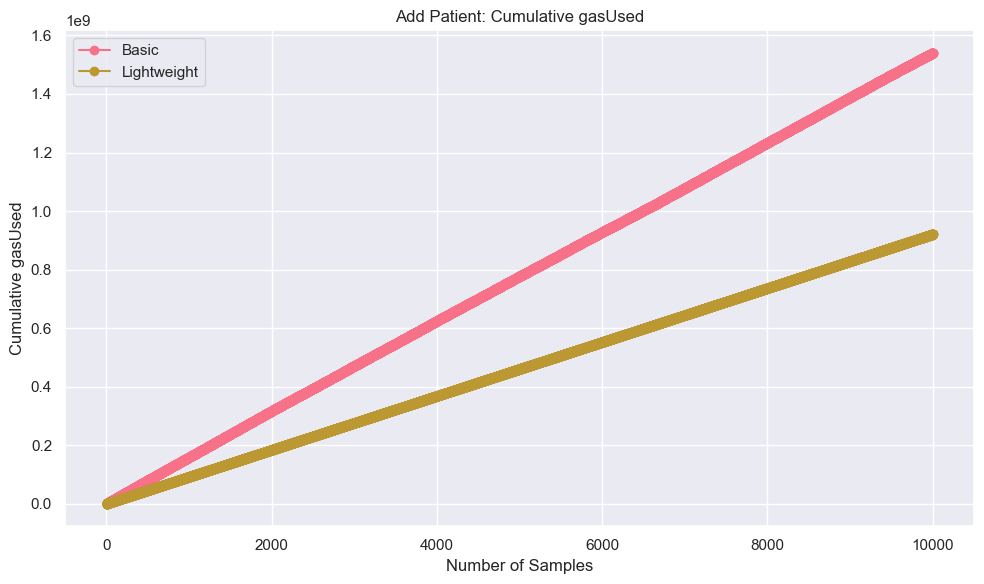

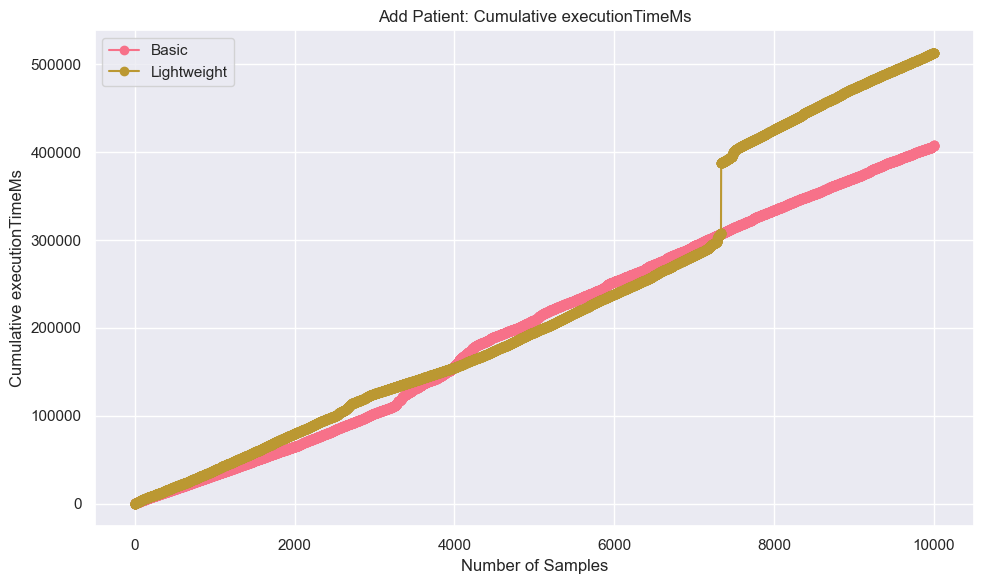

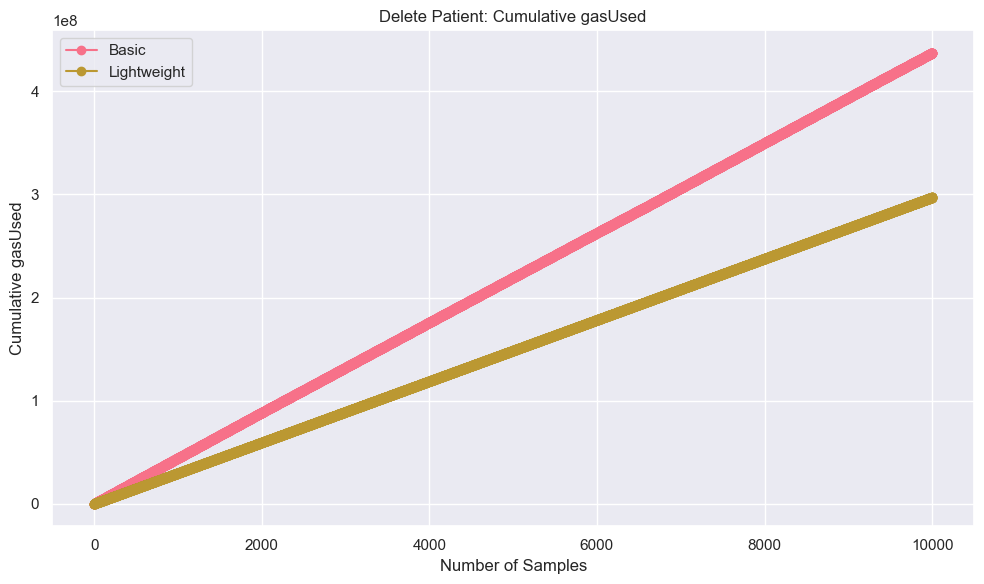

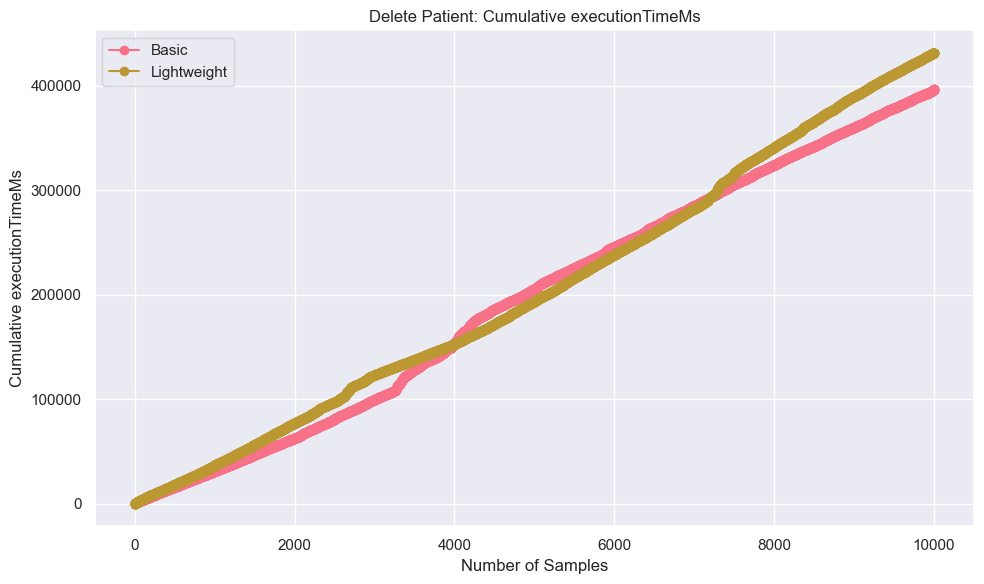

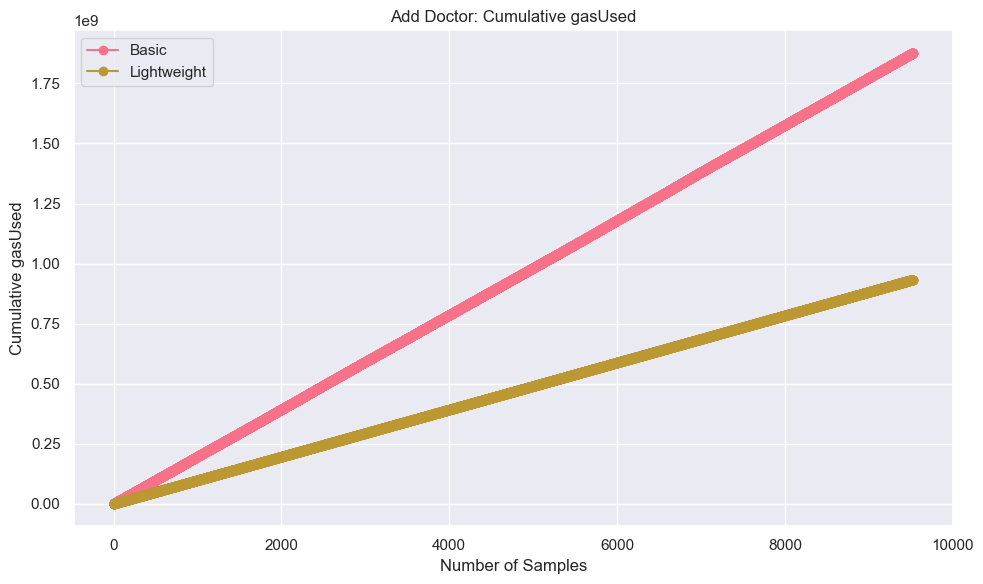

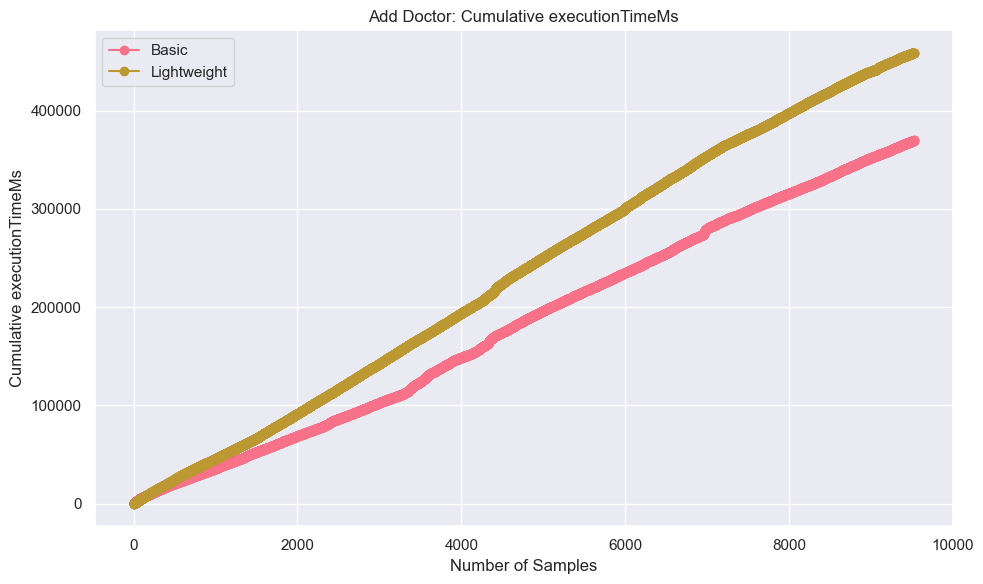

In [2]:
def plot_cumulative_metrics(basic_data, light_data, operation_name, metric_name):
    """Plots cumulative metrics for basic and lightweight operations."""
    basic_values = [x[metric_name] for x in basic_data]
    light_values = [x[metric_name] for x in light_data]
    
    # Calculate cumulative values
    basic_cumulative = np.cumsum(basic_values)
    light_cumulative = np.cumsum(light_values)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(basic_cumulative) + 1), basic_cumulative, label='Basic', marker='o')
    plt.plot(range(1, len(light_cumulative) + 1), light_cumulative, label='Lightweight', marker='o')
    
    plt.title(f'{operation_name}: Cumulative {metric_name}')
    plt.xlabel('Number of Samples')
    plt.ylabel(f'Cumulative {metric_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{operation_name}_cumulative_{metric_name}.png')
    plt.show()

# Plot cumulative gas usage and execution time for Add Patient
plot_cumulative_metrics(basic_add_patient, light_add_patient, 'Add Patient', 'gasUsed')
plot_cumulative_metrics(basic_add_patient, light_add_patient, 'Add Patient', 'executionTimeMs')

# Plot cumulative gas usage and execution time for Delete Patient
plot_cumulative_metrics(basic_delete_patient, light_delete_patient, 'Delete Patient', 'gasUsed')
plot_cumulative_metrics(basic_delete_patient, light_delete_patient, 'Delete Patient', 'executionTimeMs') 

# Plot cumulative gas usage and execution time for Add Doctor
plot_cumulative_metrics(basic_add_doctor, light_add_doctor, 'Add Doctor', 'gasUsed')
plot_cumulative_metrics(basic_add_doctor, light_add_doctor, 'Add Doctor', 'executionTimeMs')